### 1. Obtaining Data
We first need to put the file 'all_seasons.csv' into the sample data folder in order for the next cell to be able to grab the data.

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import plotly.express as px
data = pd.read_csv('sample_data/all_seasons.csv', index_col=0)
data

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,3,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12840,John Butler Jr.,POR,20.0,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,Undrafted,...,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,1,19,...,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,2,58,...,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23


In [103]:
# Get all the column names.
for col in data.columns:
    print(col)

player_name
team_abbreviation
age
player_height
player_weight
college
country
draft_year
draft_round
draft_number
gp
pts
reb
ast
net_rating
oreb_pct
dreb_pct
usg_pct
ts_pct
ast_pct
season


### 2. Missing Data

In [104]:
# When running this we see that there are only null values in the 'college' column.
# This being null is important to keep in mind but doesn't matter for a lot of purposes.
# The reason it is null is because it isn't required for a NBA to have played in college.
# This especially applies to players from other countries.
for col in data.columns:
  print(data[data[col].isnull()])

Empty DataFrame
Columns: [player_name, team_abbreviation, age, player_height, player_weight, college, country, draft_year, draft_round, draft_number, gp, pts, reb, ast, net_rating, oreb_pct, dreb_pct, usg_pct, ts_pct, ast_pct, season]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [player_name, team_abbreviation, age, player_height, player_weight, college, country, draft_year, draft_round, draft_number, gp, pts, reb, ast, net_rating, oreb_pct, dreb_pct, usg_pct, ts_pct, ast_pct, season]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [player_name, team_abbreviation, age, player_height, player_weight, college, country, draft_year, draft_round, draft_number, gp, pts, reb, ast, net_rating, oreb_pct, dreb_pct, usg_pct, ts_pct, ast_pct, season]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [player_name, team_abbreviation, age, player_height, player_weight, college, country, draft_year, draft_round, draft_number, gp, pts, reb, ast, net_rating, oreb_pct, dreb_

### 3. Data Wrangling

In [105]:
#I will wrangle the data as needed for each question answered below.

### 4. Graphing

### Learning how to work with the dataset

In [106]:
data_nums = data.drop(['player_name', 'team_abbreviation', 'college', 'country', 'draft_year', 'draft_round', 'draft_number', 'season'], axis=1)
data_nums

# Sourced from https://medium.com/@yatharthranjan/finding-top-correlation-pairs-from-a-large-number-of-variables-in-pandas-f530be53e82a
def get_top_correlations_blog(df, threshold=0.3):
    orig_corr = df.corr()
    c = orig_corr.abs()

    so = c.unstack()

    print("|    Variable 1    |    Variable 2    | Correlation Coefficient    |")
    print("|------------------|------------------|----------------------------|")

    i=0
    pairs=set()
    result = pd.DataFrame()
    for index, value in so.sort_values(ascending=False).items():
        # Exclude duplicates and self-correlations
        if value > threshold \
        and index[0] != index[1] \
        and (index[0], index[1]) not in pairs \
        and (index[1], index[0]) not in pairs:

            print(f'|    {index[0]}    |    {index[1]}    |    {orig_corr.loc[(index[0], index[1])]}    |')
            result.loc[i, ['Variable 1', 'Variable 2', 'Correlation Coefficient']] = [index[0], index[1], orig_corr.loc[(index[0], index[1])]]
            pairs.add((index[0], index[1]))
            i+=1
    return result.reset_index(drop=True).set_index(['Variable 1', 'Variable 2'])

top_corr = get_top_correlations_blog(data_nums)

|    Variable 1    |    Variable 2    | Correlation Coefficient    |
|------------------|------------------|----------------------------|
|    player_weight    |    player_height    |    0.8221411921651958    |
|    ast_pct    |    ast    |    0.8031503390368976    |
|    ast    |    pts    |    0.6643198678599312    |
|    usg_pct    |    pts    |    0.6414688572292001    |
|    reb    |    pts    |    0.624509069141677    |
|    player_height    |    dreb_pct    |    0.6142732506751545    |
|    dreb_pct    |    reb    |    0.6118988091036359    |
|    player_height    |    ast_pct    |    -0.6086957636321292    |
|    dreb_pct    |    player_weight    |    0.6056385402672094    |
|    player_weight    |    oreb_pct    |    0.5995106935338302    |
|    oreb_pct    |    player_height    |    0.5895379533365793    |
|    dreb_pct    |    oreb_pct    |    0.5553581978128521    |
|    pts    |    gp    |    0.536003335411512    |
|    ast_pct    |    player_weight    |    -0.521939179272

In [107]:
#We can use a linear regression, and do all accuracy metrics.
def lin_regres(x, y):
  xbar = x - x.mean()
  ybar = y - y.mean()
  b1 = (xbar.dot(ybar)) / (xbar.dot(xbar))
  b0 = y.mean() - (b1 * x.mean())
  y1 = b0 + (b1 * x)
  return b0, b1

def mae_metric(y_predict,y_true):
  sum = 0
  for x in range(y_predict.size):
    sum = sum + round(abs(y_predict[x] - y_true[x]), 10)
  return (sum / (y_predict.size))

def sse_metric(y_predict,y_true):
  sum = 0
  for x in range(y_predict.size):
    sum = sum + round(((y_predict[x] - y_true[x]) * (y_predict[x] - y_true[x])), 10)
  return sum

def mse_metric(y_predict,y_true):
  sum = 0
  for x in range(y_predict.size):
    sum = sum + round(((y_predict[x] - y_true[x]) * (y_predict[x] - y_true[x])), 10)
  return (sum / (y_predict.size))

def rmse_metric(y_predict,y_true):
  sum = 0
  for x in range(y_predict.size):
    sum = sum + round(((y_predict[x] - y_true[x]) * (y_predict[x] - y_true[x])), 10)
  return math.sqrt(sum / (y_predict.size))

def rmsle_metric(y_predict,y_true):
  sum = 0
  for x in range(y_predict.size):
    sum = sum + ((abs(math.log(((1 + y_predict[x]) / (1 + y_true[x]))))) * (abs(math.log(((1 + y_predict[x]) / (1 + y_true[x]))))))
  return math.sqrt(sum / (y_predict.size))

In [108]:
#An example of how to use them.
y_true = np.array([3, 7, 11, 15, 21])
y_predict = np.array([2.5, 7.2, 11.0, 15.4, 20.6])
print("The mean absolute error is: " + str(mae_metric(y_predict,y_true)))    # Result of   MAE is 0.300
print("The sum of squared errors is: " + str(sse_metric(y_predict,y_true)))    # Result of   SSE is 0.610
print("The mean squared error is: " + str(mse_metric(y_predict,y_true)))    # Result of   MSE is 0.122
print("The root mean squared error is: " + str(rmse_metric(y_predict,y_true)))   # Result of  RMSE is 0.350
print("The root mean squared logarithmic error is: " + str(rmsle_metric(y_predict,y_true)))  # Result of RMSLE is 0.0622

The mean absolute error is: 0.3
The sum of squared errors is: 0.61
The mean squared error is: 0.122
The root mean squared error is: 0.3492849839314596
The root mean squared logarithmic error is: 0.062268409228412855


In [109]:
# Average points per game career for Stephen Curry
Curry = data[data['player_name'] == 'Stephen Curry']
print('On average, Stephen Curry would score ' + str(round(Curry['pts'].mean(), 1)) + ' points in a game accross his entire career.')

# Average points per game career for Lebron James
LeBron = data[data['player_name'] == 'LeBron James']
print('On average, LeBron James would score ' + str(round(LeBron['pts'].mean(), 1)) + ' points in a game accross his entire career.')

On average, Stephen Curry would score 24.2 points in a game accross his entire career.
On average, LeBron James would score 27.2 points in a game accross his entire career.


In [110]:
#All first round draft picks
RND1 = data[data['draft_round'] == '1']
print('Career points per game for all round one players: ' + str(round(RND1['pts'].mean(), 1)))

#All second round draft picks
RND2 = data[data['draft_round'] == '2']
print('Career points per game for all round two players: ' + str(round(RND2['pts'].mean(), 1)))

#All third round draft picks
RND3 = data[data['draft_round'] == '3']
print('Career points per game for all round three players: ' + str(round(RND3['pts'].mean(), 1)))

#All fourth round draft picks
RND4 = data[data['draft_round'] == '4']
print('Career points per game for all round four players: ' + str(round(RND4['pts'].mean(), 1)))

#All undrafted players
RNDU = data[data['draft_round'] == 'Undrafted']
print('Career points per game for all undrafted players: ' + str(round(RNDU['pts'].mean(), 1)))

Career points per game for all round one players: 10.2
Career points per game for all round two players: 6.3
Career points per game for all round three players: 7.3
Career points per game for all round four players: 2.1
Career points per game for all undrafted players: 4.8


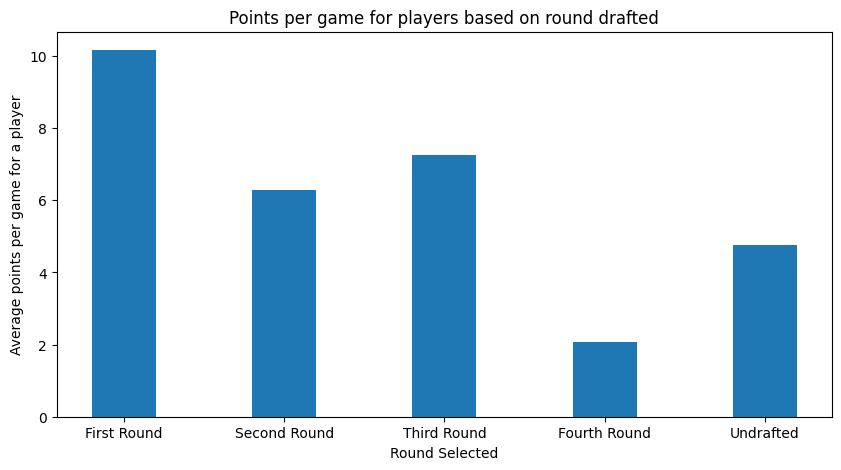

In [111]:
# creating the dataset
data2 = {'First Round':RND1['pts'].mean(), 'Second Round':RND2['pts'].mean(), 'Third Round':RND3['pts'].mean(),
        'Fourth Round':RND4['pts'].mean(), 'Undrafted':RNDU['pts'].mean()}
courses = list(data2.keys())
values = list(data2.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values,
        width = 0.4)

plt.xlabel("Round Selected")
plt.ylabel("Average points per game for a player")
plt.title("Points per game for players based on round drafted")
plt.show()

### 5. Questions we can try to answer.
## Question #1
What is the relation between height and the rebounding ability of an NBA player?

## Question #2
What is the relation between weight and the rebounding ability of an NBA player?

## Question #3
What is the relation between how much the average player scores and year?

### To answer the question: "What is the relation between height and the rebounding ability of an NBA player?"

In [112]:
#We want to see if there is a correlation between player height and average rebounds per game for the same player. This cell gets the name of a player, their average rebounds per game for their career, and their height.
unique_players = data['player_name'].unique()
unique_players_average_reb1 = pd.DataFrame()
dict = {'player_name':[],
        'reb':[],
        'player_height':[]
       }
unique_players_average_reb1 = pd.DataFrame(dict)

for player in unique_players:
  playerAvg = data[data['player_name'] == player]
  unique_players_average_reb1.loc[len(unique_players_average_reb1.index)] = [player, playerAvg['reb'].mean(), playerAvg['player_height'].mean()]

unique_players_average_reb1

,player_name,reb,player_height
0,Randy Livingston,1.054545,193.04
1,Gaylon Nickerson,1.300000,190.50
2,George Lynch,5.422222,203.20
3,George McCloud,3.316667,203.20
4,George Zidek,1.550000,213.36
...,...,...,...
2546,Jaylin Williams,4.900000,205.74
2547,Jeenathan Williams,3.000000,195.58
2548,Jeff Dowtin Jr.,0.900000,190.50
2549,Jeremy Sochan,5.300000,203.20


In [113]:
# This shows that there is a correlation, although it is much of one.
correlation = unique_players_average_reb1.drop(['player_name'], axis=1)
correlation.corr()

,reb,player_height
reb,1.00000,0.39848
player_height,0.39848,1.00000


Our line of best fit is: y = (-14.43277 + (0.0856 * x))


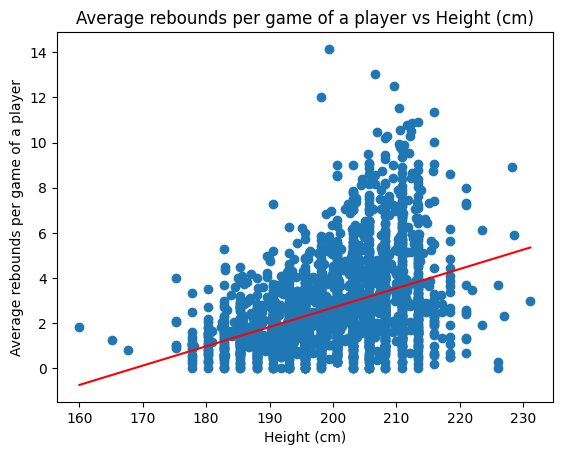

In [114]:
#Next we create a scatterplot to show "Average rebounds per game of a player vs Height (cm)." We also create a linear regression through the data to find the linear trend.
height = unique_players_average_reb1['player_height']
rebounds = unique_players_average_reb1['reb']

regres1 = lin_regres(height, rebounds)
x1 = np.linspace(height.min(), height.max(), 100)
y1 = regres1[0] + regres1[1]*x1
print("Our line of best fit is: y = (" + str(round(regres1[0], 5)) + " + (" + str(round(regres1[1], 5)) + " * x))")

plt.plot(x1, y1, c="red")
plt.scatter(height, rebounds)
plt.xlabel("Height (cm)")
plt.ylabel("Average rebounds per game of a player")
plt.title("Average rebounds per game of a player vs Height (cm)")
plt.show()

In [115]:
# unique_players_average_reb1[unique_players_average_reb1.index==0]
# five_random_players = [unique_players_average_reb1[unique_players_average_reb1.index==random.randrange(0, 2550, 1)],
# unique_players_average_reb1[unique_players_average_reb1.index==random.randrange(0, 2550, 1)],
# unique_players_average_reb1[unique_players_average_reb1.index==random.randrange(0, 2550, 1)],
# unique_players_average_reb1[unique_players_average_reb1.index==random.randrange(0, 2550, 1)],
# unique_players_average_reb1[unique_players_average_reb1.index==random.randrange(0, 2550, 1)]]
# five_random_players

In [116]:
# We'll now evaluate the linear regression we've created using the metrics created earlier.
one_reb = unique_players_average_reb1[unique_players_average_reb1['player_name'] == 'Ryan Anderson']['reb'].mean()
two_reb = unique_players_average_reb1[unique_players_average_reb1['player_name'] == 'Vince Williams Jr.']['reb'].mean()
three_reb = unique_players_average_reb1[unique_players_average_reb1['player_name'] == 'Duane Washington Jr.']['reb'].mean()
four_reb = unique_players_average_reb1[unique_players_average_reb1['player_name'] == 'Mike Taylor']['reb'].mean()
five_reb = unique_players_average_reb1[unique_players_average_reb1['player_name'] == 'Jarell Martin']['reb'].mean()

one_predict = (-14.43277 + (0.0856 * unique_players_average_reb1[unique_players_average_reb1['player_name'] == 'Ryan Anderson']['player_height'].mean()))
two_predict = (-14.43277 + (0.0856 * unique_players_average_reb1[unique_players_average_reb1['player_name'] == 'Vince Williams Jr.']['player_height'].mean()))
three_predict = (-14.43277 + (0.0856 * unique_players_average_reb1[unique_players_average_reb1['player_name'] == 'Duane Washington Jr.']['player_height'].mean()))
four_predict = (-14.43277 + (0.0856 * unique_players_average_reb1[unique_players_average_reb1['player_name'] == 'Mike Taylor']['player_height'].mean()))
five_predict = (-14.43277 + (0.0856 * unique_players_average_reb1[unique_players_average_reb1['player_name'] == 'Jarell Martin']['player_height'].mean()))

#The closer these results are to zero, the more accurate our data is. When these are ran, they usually aren't too close to zero which doesn't bode favorably for our data.
y_true = np.array([one_reb, two_reb, three_reb, four_reb, five_reb])
y_predict = np.array([one_predict, two_predict, three_predict, four_predict, five_predict])
print("The mean absolute error is: " + str(mae_metric(y_predict,y_true)))
print("The sum of squared errors is: " + str(sse_metric(y_predict,y_true)))
print("The mean squared error is: " + str(mse_metric(y_predict,y_true)))
print("The root mean squared error is: " + str(rmse_metric(y_predict,y_true)))
print("The root mean squared logarithmic error is: " + str(rmsle_metric(y_predict,y_true)))

The mean absolute error is: 0.6353236
The sum of squared errors is: 3.9601761765000005
The mean squared error is: 0.7920352353000001
The root mean squared error is: 0.8899636145933159
The root mean squared logarithmic error is: 0.247098154445916


### To answer the question "What is the relation between weight and the rebounding ability of an NBA player?"

In [117]:
#We want to see if there is a correlation between player weight and average rebounds per game for the same player. This cell gets the name of a player, their average rebounds per game for their career, and their weight.
unique_players = data['player_name'].unique()
unique_players_average_reb2 = pd.DataFrame()
dict = {'player_name':[],
        'reb':[],
        'player_weight':[]
       }
unique_players_average_reb2 = pd.DataFrame(dict)

for player in unique_players:
  playerAvg = data[data['player_name'] == player]
  unique_players_average_reb2.loc[len(unique_players_average_reb2.index)] = [player, playerAvg['reb'].mean(), playerAvg['player_weight'].mean()]

unique_players_average_reb2

,player_name,reb,player_weight
0,Randy Livingston,1.054545,94.883199
1,Gaylon Nickerson,1.300000,86.182480
2,George Lynch,5.422222,104.477357
3,George McCloud,3.316667,102.058200
4,George Zidek,1.550000,116.573144
...,...,...,...
2546,Jaylin Williams,4.900000,108.862080
2547,Jeenathan Williams,3.000000,92.986360
2548,Jeff Dowtin Jr.,0.900000,80.285784
2549,Jeremy Sochan,5.300000,104.326160


In [118]:
correlation = unique_players_average_reb2.drop(['player_name'], axis=1)
correlation.corr()

,reb,player_weight
reb,1.000000,0.406723
player_weight,0.406723,1.000000


Our line of best fit is: y = (-3.64438 + (0.06389 * x))


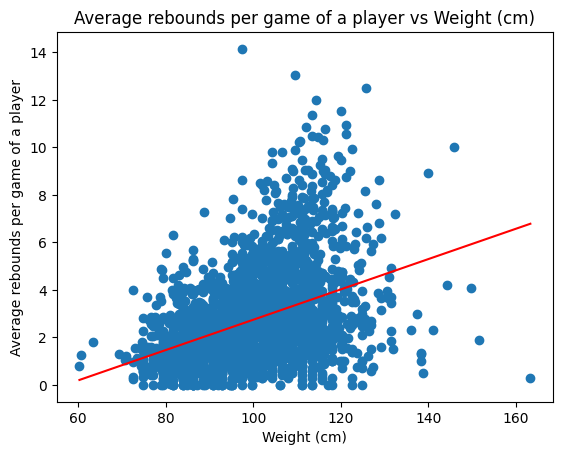

In [119]:
#Next we create a scatterplot to show "Average rebounds per game of a player vs Weight (cm)." We also create a linear regression through the data to find the linear trend.
weight = unique_players_average_reb2['player_weight']
rebounds = unique_players_average_reb2['reb']

regres1 = lin_regres(weight, rebounds)
x1 = np.linspace(weight.min(), weight.max(), 100)
y1 = regres1[0] + regres1[1]*x1
print("Our line of best fit is: y = (" + str(round(regres1[0], 5)) + " + (" + str(round(regres1[1], 5)) + " * x))")

plt.plot(x1, y1, c="red")
plt.scatter(weight, rebounds)
plt.xlabel("Weight (cm)")
plt.ylabel("Average rebounds per game of a player")
plt.title("Average rebounds per game of a player vs Weight (cm)")
plt.show()

In [120]:
# We'll now evaluate the linear regression we've created using the metrics created earlier.
one_reb = unique_players_average_reb2[unique_players_average_reb2['player_name'] == 'Ryan Anderson']['reb'].mean()
two_reb = unique_players_average_reb2[unique_players_average_reb2['player_name'] == 'Vince Williams Jr.']['reb'].mean()
three_reb = unique_players_average_reb2[unique_players_average_reb2['player_name'] == 'Duane Washington Jr.']['reb'].mean()
four_reb = unique_players_average_reb2[unique_players_average_reb2['player_name'] == 'Mike Taylor']['reb'].mean()
five_reb = unique_players_average_reb2[unique_players_average_reb2['player_name'] == 'Jarell Martin']['reb'].mean()

one_predict = (-3.64438 + (0.06389 * unique_players_average_reb2[unique_players_average_reb2['player_name'] == 'Ryan Anderson']['player_weight'].mean()))
two_predict = (-3.64438 + (0.06389 * unique_players_average_reb2[unique_players_average_reb2['player_name'] == 'Vince Williams Jr.']['player_weight'].mean()))
three_predict = (-3.64438 + (0.06389 * unique_players_average_reb2[unique_players_average_reb2['player_name'] == 'Duane Washington Jr.']['player_weight'].mean()))
four_predict = (-3.64438 + (0.06389 * unique_players_average_reb2[unique_players_average_reb2['player_name'] == 'Mike Taylor']['player_weight'].mean()))
five_predict = (-3.64438 + (0.06389 * unique_players_average_reb2[unique_players_average_reb2['player_name'] == 'Jarell Martin']['player_weight'].mean()))

#The closer these results are to zero, the more accurate our data is. When these are ran, they usually aren't too close to zero which doesn't bode favorably for our data.
y_true = np.array([one_reb, two_reb, three_reb, four_reb, five_reb])
y_predict = np.array([one_predict, two_predict, three_predict, four_predict, five_predict])
print("The mean absolute error is: " + str(mae_metric(y_predict,y_true)))
print("The sum of squared errors is: " + str(sse_metric(y_predict,y_true)))
print("The mean squared error is: " + str(mse_metric(y_predict,y_true)))
print("The root mean squared error is: " + str(rmse_metric(y_predict,y_true)))
print("The root mean squared logarithmic error is: " + str(rmsle_metric(y_predict,y_true)))

The mean absolute error is: 0.8379110112800001
The sum of squared errors is: 5.257287373899999
The mean squared error is: 1.0514574747799998
The root mean squared error is: 1.025406004848811
The root mean squared logarithmic error is: 0.3048610210985785


### To answer the question "What is the relation between how much the average player scores and year?"

In [123]:
#We want to see if there is a correlation between nba season (year), and how much on average players score.
unique_seasons = data['season'].unique()
unique_seasons_average_points = pd.DataFrame()
dict = {'season':[],
        'pts':[]
       }
unique_seasons_average_points = pd.DataFrame(dict)

for season in unique_seasons:
  seasonAvg = data[data['season'] == season]
  unique_seasons_average_points.loc[len(unique_seasons_average_points.index)] = [season, seasonAvg['pts'].mean()]

unique_seasons_average_points

,season,pts
0,1996-97,8.026077
1,1997-98,7.947608
2,1998-99,7.358542
3,1999-00,7.985845
4,2000-01,7.811338
5,2001-02,7.982727
6,2002-03,7.849299
7,2003-04,7.745475
8,2004-05,8.088147
9,2005-06,7.982533


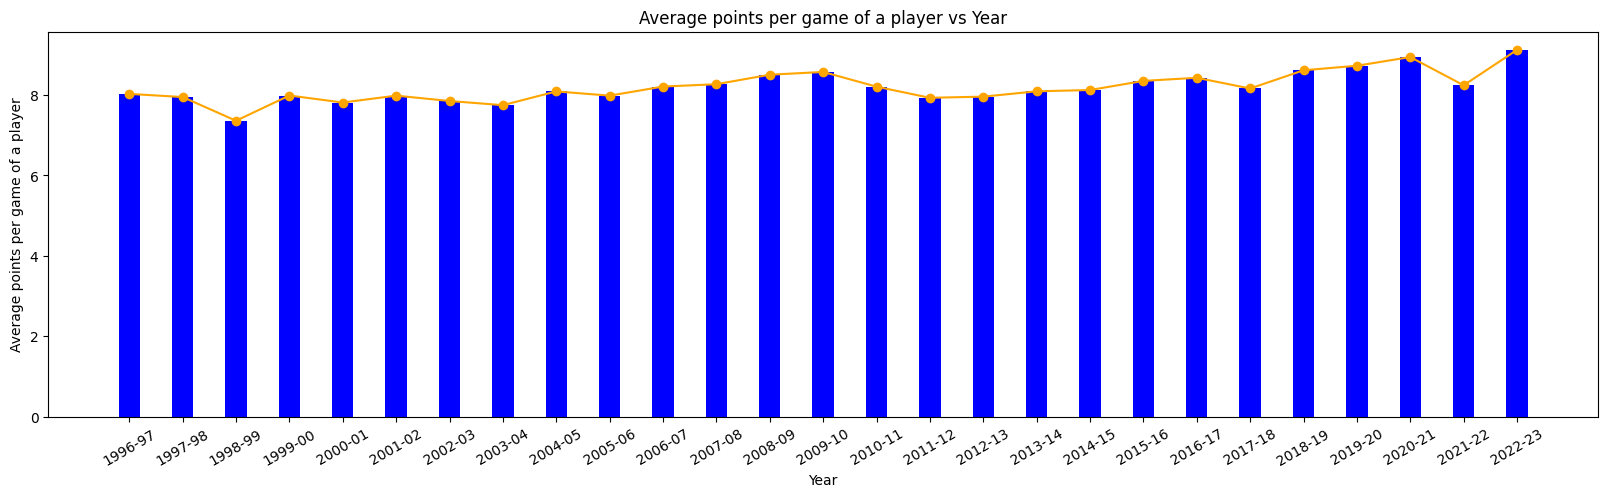

In [124]:
#Next we create a scatterplot to show "Average points per game of a player vs Year."
points = unique_seasons_average_points['pts']
year = unique_seasons_average_points['season']

fig = plt.figure(figsize = (20, 5))
plt.bar(year, points, color='blue', width=0.4)
plt.xlabel("Year")
plt.xticks(rotation=30)
plt.ylabel("Average points per game of a player")
plt.title("Average points per game of a player vs Year")
plt.plot(year, points, '-o', color='orange')
plt.ion()
plt.show()

fig = px.bar(year, points, title="Year vs Average points per game of a player")
fig.show()